<a href="https://colab.research.google.com/github/Zamariolo/MogiOpenData/blob/master/Isolamento_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de isolamento da cidade de Mogi Guaçu

In [0]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

In [0]:
#Importando o dataset e ajustando para formato numérico
dataset = pd.read_csv('https://raw.githubusercontent.com/Zamariolo/MogiOpenData/master/Dados/dadosIsolamentoMogiGuacu.csv')

In [3]:
dataset.head(3)

,DATA,Município,Cdufmun,UF,Escala de cor,Number of Records,População,Índice de isolamento,isolamento_num,Dia da semana
0,3/5/2020,Mogi Guaçu,3530706,SP,Até 40%,1,151888,40%,0.40,Quinta-Feira
1,3/6/2020,Mogi Guaçu,3530706,SP,Até 40%,1,151888,38%,0.38,Sexta-feira
2,3/12/2020,Mogi Guaçu,3530706,SP,Até 40%,1,151888,35%,0.35,Quinta-Feira


# Quando foi a última atualização destes dados?

In [4]:
print("Dados atualizados em: %s" %dataset['DATA'].max())

Dados atualizados em: 5/9/2020


# Quem coleta e como são coletados os dados de isolamento em Mogi Guaçu?

Os dados são coletados pelo Sistema de Monitoramento Inteligente do Governo de São Paulo em parceria com as operadoras de telefonia Vivo, Claro, Oi e TIM, que analisa os dados de telefonia móvel, de forma anonima e agrupada, sem desrespeitar a privacidade dos usuários.

Os dados aqui utilizados são obtidos diretamente pelo link: https://www.saopaulo.sp.gov.br/coronavirus/isolamento



# Como está o histórico de isolamento da cidade?

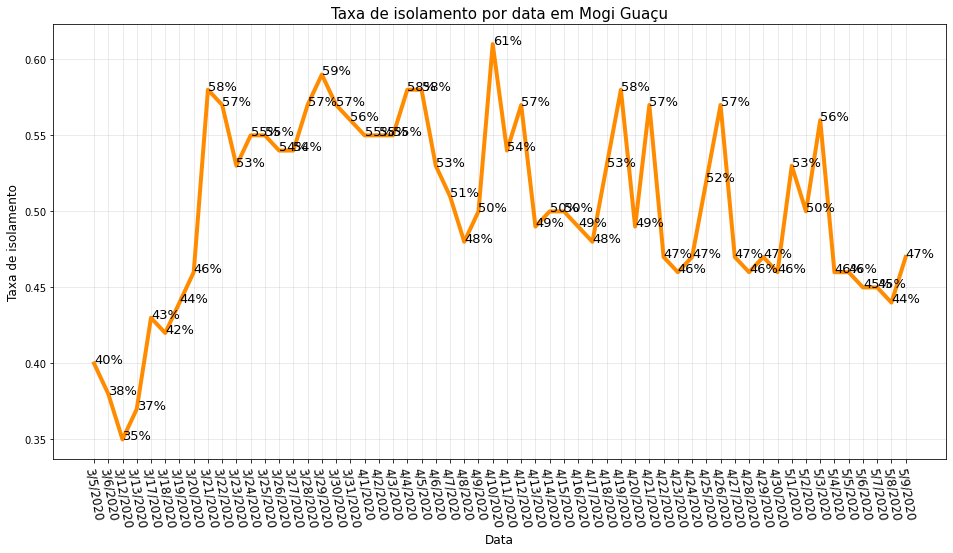

In [5]:
plt.figure(figsize=(16,8))
plt.plot(dataset.DATA, dataset['isolamento_num'], linewidth=4, color='darkorange')
plt.ylabel("Taxa de isolamento", fontsize=12)
plt.xlabel("Data", fontsize=12)
plt.xticks(dataset.DATA, rotation=280, fontsize=12)
plt.title("Taxa de isolamento por data em Mogi Guaçu", fontsize=15)
plt.grid(alpha=0.3)

#Texto
for i in range(len(dataset.DATA)):
    plt.text(dataset.DATA.iloc[i], dataset.isolamento_num.iloc[i], ("%.0f%%" %(dataset.isolamento_num.iloc[i]*100)), fontsize=13, color='black')

# Quando o isolamento começou a ser monitorado em Mogi Guaçu?

In [6]:
dataset.DATA.min()

'3/12/2020'

# Como está a distribuição de isolamento por dia da semana?

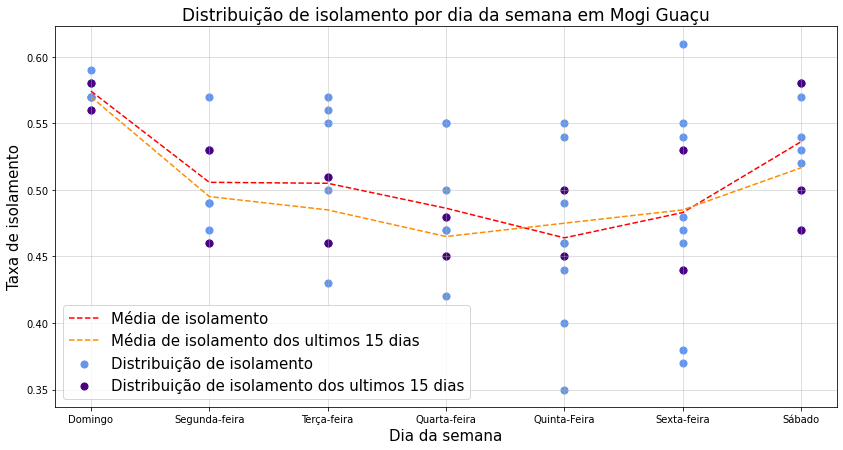

In [7]:
dataset15 = dataset.sort_values('DATA', ascending=False).iloc[:15]

medias = dataset.groupby('Dia da semana')['isolamento_num'].mean().reindex(index=['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-Feira', 'Sexta-feira', 'Sábado'])
medias15 = dataset15.groupby('Dia da semana')['isolamento_num'].mean().reindex(index=['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-Feira', 'Sexta-feira', 'Sábado'])

ax = plt.figure(figsize=(14,7))
plt.plot(medias.index, medias.values, linestyle='--', color='red', label='Média de isolamento')
plt.plot(medias15.index, medias15.values, linestyle='--', color='darkorange', label='Média de isolamento dos ultimos 15 dias')
plt.scatter(dataset['Dia da semana'], dataset['isolamento_num'], s=50, color='cornflowerblue', label='Distribuição de isolamento')
plt.scatter(dataset15['Dia da semana'], dataset15['isolamento_num'], s=50, color='indigo', label='Distribuição de isolamento dos ultimos 15 dias')
plt.grid(alpha=0.5)
plt.title("Distribuição de isolamento por dia da semana em Mogi Guaçu", fontsize=17)
plt.xlabel("Dia da semana", fontsize=15)
plt.xticks()
plt.ylabel("Taxa de isolamento", fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Qual foi a média de isolamento em Mogi Guaçu desde o primeiro dia de monitoramento?

In [8]:
dataset['isolamento_num'].mean()
print("O isolamento médio, considerando todos os dados coletados desde o dia %s é de %.2f%%" %(dataset.DATA.min(),dataset['isolamento_num'].mean()*100))

O isolamento médio, considerando todos os dados coletados desde o dia 3/12/2020 é de 50.43%


# Qual foi a taxa de isolamento média nos últimos 7 dias?

In [9]:
#Tirando valores medios dos ultimos 7 dias
ultimo7 = dataset.iloc[-7:, :]
mediaIsolamento = ultimo7.isolamento_num.mean()
populacao = dataset['População'].min()
print("Taxa de isolamento média dos últimos 7 dias: %.2f%%" %(mediaIsolamento*100))
print("Número de pessoas médias em isolamento nos últimos 7 dias: %.0f pessoas" %(populacao*mediaIsolamento))
print("Número de pessoas médias circulando nas ruas nos últimos 7 dias: %.0f pessoas" %(populacao*(1-mediaIsolamento)))
print("\n Obs: Considerando a população estimada de 151888 habitantes (IBGE (2019))")

Taxa de isolamento média dos últimos 7 dias: 47.00%
Número de pessoas médias em isolamento nos últimos 7 dias: 71387 pessoas
Número de pessoas médias circulando nas ruas nos últimos 7 dias: 80501 pessoas

 Obs: Considerando a população estimada de 151888 habitantes (IBGE (2019))


# Quais dias Mogi Guaçu obteve as maiores taxas de isolamento?

In [10]:
dataset.sort_values('isolamento_num', ascending=False)[['DATA', 'Índice de isolamento']].head(10)

,DATA,Índice de isolamento
28,4/10/2020,61%
16,3/29/2020,59%
37,4/19/2020,58%
23,4/5/2020,58%
8,3/21/2020,58%
22,4/4/2020,58%
39,4/21/2020,57%
30,4/12/2020,57%
44,4/26/2020,57%
9,3/22/2020,57%


# Finais de semana apresentam taxa de isolamento maior que nos dias de semana?



Considerando todos os dados coletados (desde dia 3/12/2020):
Taxa de isolamento média nos finais de semana: 55.40%
Taxa de isolamento média nos dias uteis: 48.70%


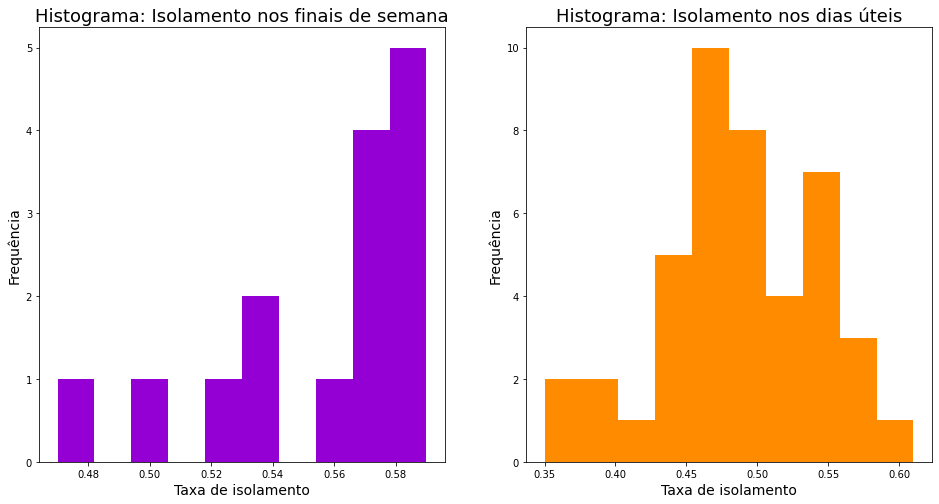

In [11]:
isolamentoFds = dataset[dataset['Dia da semana'].isin(['Sábado', 'Domingo'])]['isolamento_num']
isolamentoDiaUtil = dataset[~dataset['Dia da semana'].isin(['Sábado', 'Domingo'])]['isolamento_num']

print("Considerando todos os dados coletados (desde dia %s):" %dataset.DATA.min())
print("Taxa de isolamento média nos finais de semana: %.2f%%" %(isolamentoFds.mean()*100))
print("Taxa de isolamento média nos dias uteis: %.2f%%" %(isolamentoDiaUtil.mean()*100))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Histograma: Isolamento nos finais de semana", fontsize=18)
plt.ylabel("Frequência", fontsize=14)
plt.xlabel("Taxa de isolamento", fontsize=14)
plt.hist(isolamentoFds, color='darkviolet')

plt.subplot(1,2,2)
plt.title("Histograma: Isolamento nos dias úteis", fontsize=18)
plt.ylabel("Frequência", fontsize=14)
plt.xlabel("Taxa de isolamento", fontsize=14)
plt.hist(isolamentoDiaUtil, color='darkorange')
plt.show()

In [12]:
list(np.histogram(isolamentoFds)[0])

[1, 0, 1, 0, 1, 2, 0, 1, 4, 5]

# Quais são as informações contidas nestes dados?

In [13]:
dataset.head(2)

,DATA,Município,Cdufmun,UF,Escala de cor,Number of Records,População,Índice de isolamento,isolamento_num,Dia da semana
0,3/5/2020,Mogi Guaçu,3530706,SP,Até 40%,1,151888,40%,0.40,Quinta-Feira
1,3/6/2020,Mogi Guaçu,3530706,SP,Até 40%,1,151888,38%,0.38,Sexta-feira




*   **Cdufmun**: Código federal do munícipio;
*   **Munícipio**: Nome do munícipio;
*   **DATA**: dia, mês e ano da informação;
*   **População**: população estimada pelo IBGE para o ano de 2020 (151888 pessoas);
*   **Índice de isolamento**: Taxa de pessoas que permanecerem em casa segundo dados do SIMI-SP;
*   **isolamento_num**: Taxa de isolamento em formato numérico;
*   **Dia da semana**: Dia da semana (segunda, terça, etc...) da informação coletada.

